In [4]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [5]:
import os                        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#import eli5
#from eli5.sklearn import PermutationImportance

In [7]:
trainset_0715= pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/trainset_0715.csv')

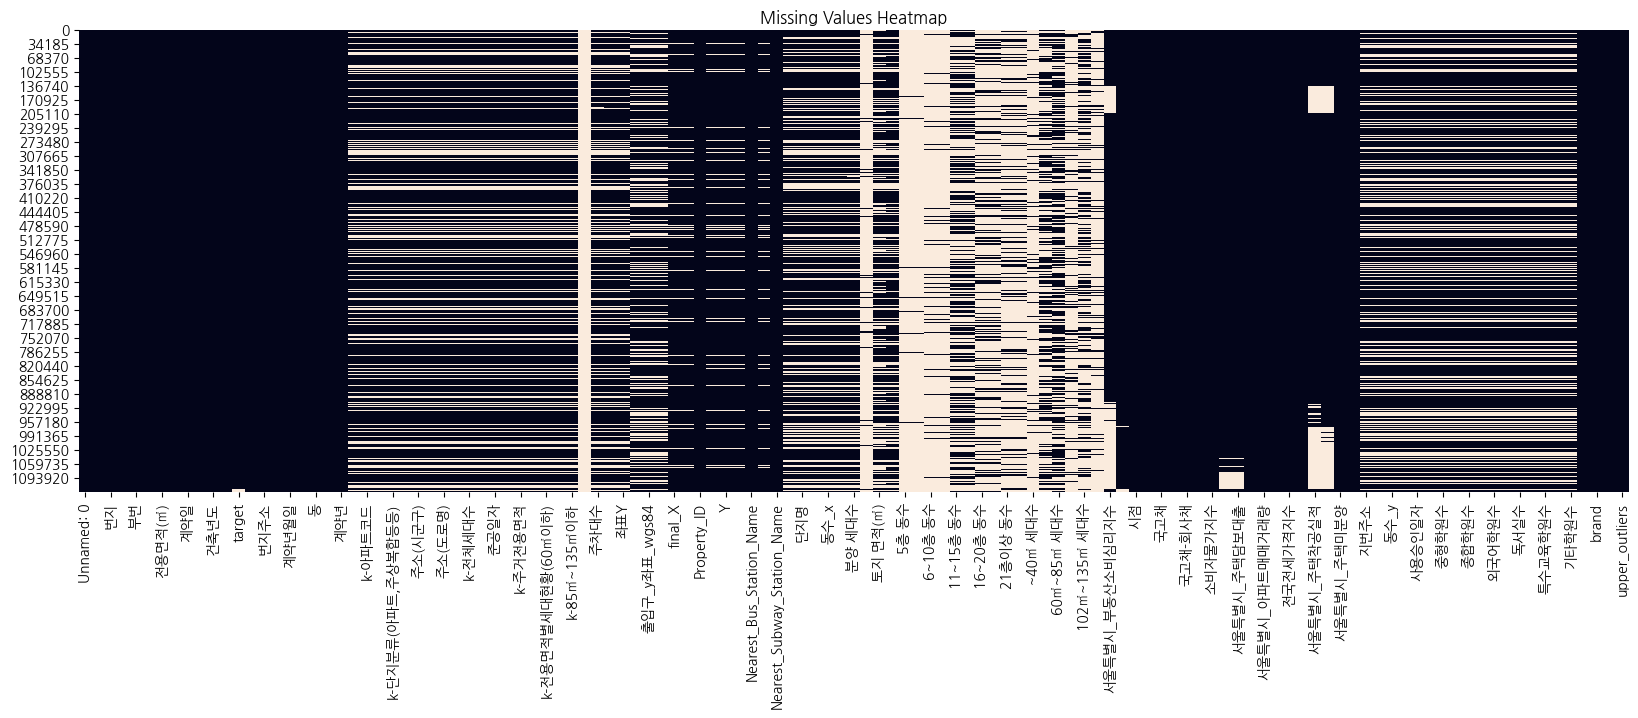

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(trainset_0715.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [102]:
print(list(trainset_0715.columns))

['Unnamed: 0', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '도로명', 'target', 'is_test', '번지주소', 'id', '계약년월일', '구', '동', '도로명주소', '계약년', '번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)', '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X', '좌표Y', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '지번주소_x', 'final_X', 'final_Y', 'Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance', 'Nearest_Bus_Station_Name', 'Nearest_Subway_Station_Distance', 'Nearest_Subway_Station_Name', '입주유형', '단지명', '지번주소_y', '동수_x', '합계 세대수', '분양 세대수', '임대 세대수', '토지 면적(㎡)', '합계 동수', '5층 동수', '5층 세대수', '6~10층 동수', '6~10층 세대수', '11~15층 동수', '11~15층 세대수', '16~20층 동수', '16~20층 세대수', '21층이상 동수', '21층이상 세대수', '~40㎡ 세대수', '40㎡~60㎡ 세대수', '60㎡~85㎡ 세대수', '85㎡~102㎡ 세대수', '102㎡~135㎡ 세대수', '135㎡~ 세대수', '서울특별시_부동산소비심리지수', '미분양_구', '시점', '기준금리', '국고채', '회사채'

In [8]:
columns = ['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', 
 '계약년월', '계약일', '층', '건축년도', '도로명', 'target', 'is_test', '번지주소', 'id', 
 '계약년월일', '구', '동', '도로명주소', '계약년', 
 '번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 
 'kapt도로명주소', '주소(시군구)', '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자', 
 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 
 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', 
 '좌표X', '좌표Y', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '지번주소_x', 'final_X', 'final_Y', 
 'Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance', 'Nearest_Bus_Station_Name', 
 'Nearest_Subway_Station_Distance', 'Nearest_Subway_Station_Name', 
 '입주유형', '단지명', '지번주소_y', '동수_x', '합계 세대수', '분양 세대수', '임대 세대수', '토지 면적(㎡)', 
 '합계 동수', '5층 동수', '5층 세대수', '6~10층 동수', '6~10층 세대수', '11~15층 동수', 
 '11~15층 세대수', '16~20층 동수', '16~20층 세대수', '21층이상 동수', '21층이상 세대수', '~40㎡ 세대수', 
 '40㎡~60㎡ 세대수', '60㎡~85㎡ 세대수', '85㎡~102㎡ 세대수', '102㎡~135㎡ 세대수', '135㎡~ 세대수', 
 '서울특별시_부동산소비심리지수', '미분양_구', '시점', '기준금리', '국고채', '회사채', '국고채-회사채', 
 '생산자물가지수', '소비자물가지수', '서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량', 
 '서울특별시_아파트매매거래량', '전국매매가격지수', '전국전세가격지수', '서울특별시_주택인허가실적', 
 '서울특별시_주택착공실적', '서울특별시_주택준공실적', '서울특별시_주택미분양', '미분양_서울특별시', 
 '지번주소', '공시가격기반단지명', '동수_y', '세대수', '사용승인일자', 
 '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', 
 '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수','모든학원수',
 'brand', 'lower_outliers', 'upper_outliers','강남여부', '가격높은동']

In [9]:
selected_columns = ['아파트명', '전용면적(㎡)', 
 '계약년월','층', '건축년도', '도로명', 'target', 'is_test', 
  '구', '동', 'k-단지분류(아파트,주상복합등등)', 
 'k-전체동수', 'k-전체세대수',
 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 
 'k-전용면적별세대현황(60㎡이하)', 
 'k-전용면적별세대현황(60㎡~85㎡이하)', 
 'k-85㎡~135㎡이하', 'k-135㎡초과', 
 '주차대수', 
 'final_X', 'final_Y','Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance', 
 '동수_x', '분양 세대수', '토지 면적(㎡)', 
 '합계 동수', '5층 동수', '5층 세대수', '6~10층 동수', '6~10층 세대수', '11~15층 동수', 
 '11~15층 세대수', '16~20층 동수', '16~20층 세대수', '21층이상 동수', '21층이상 세대수', 
 '~40㎡ 세대수', '40㎡~60㎡ 세대수', '60㎡~85㎡ 세대수', '85㎡~102㎡ 세대수', '102㎡~135㎡ 세대수', 
 '서울특별시_부동산소비심리지수', '미분양_구', '국고채-회사채', 
'서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량', 
 '서울특별시_아파트매매거래량', '전국매매가격지수', '전국전세가격지수', '서울특별시_주택인허가실적', 
 '서울특별시_주택착공실적', '서울특별시_주택준공실적', '서울특별시_주택미분양', '미분양_서울특별시', 
 '세대수', '사용승인일자', 
 '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', 
 '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수','모든학원수',
 'brand', 'lower_outliers', 'upper_outliers','강남여부', '가격높은동']

In [10]:
trainset_0715_for_model = trainset_0715[selected_columns]

In [ ]:
trainset_0715_for_model

In [12]:
train_for_model = trainset_0715_for_model[trainset_0715_for_model['is_test']==0]

In [13]:
test_for_model = trainset_0715_for_model[trainset_0715_for_model['is_test']==1]

In [15]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in train_for_model.columns:
    if pd.api.types.is_numeric_dtype(train_for_model[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '계약년월', '층', '건축년도', 'target', 'is_test', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', 'final_X', 'final_Y', 'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance', '동수_x', '분양 세대수', '토지 면적(㎡)', '합계 동수', '5층 동수', '5층 세대수', '6~10층 동수', '6~10층 세대수', '11~15층 동수', '11~15층 세대수', '16~20층 동수', '16~20층 세대수', '21층이상 동수', '21층이상 세대수', '~40㎡ 세대수', '40㎡~60㎡ 세대수', '60㎡~85㎡ 세대수', '85㎡~102㎡ 세대수', '102㎡~135㎡ 세대수', '서울특별시_부동산소비심리지수', '미분양_구', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '전국매매가격지수', '전국전세가격지수', '서울특별시_주택인허가실적', '서울특별시_주택착공실적', '서울특별시_주택준공실적', '서울특별시_주택미분양', '미분양_서울특별시', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수', '모든학원수', 'brand', 'lower_outliers', 'upper_outliers', '강남여부', '가격높은동']
범주형 변수: ['아파트명', '도로명', '구', '동', 'k-단지분류(아파트,주상복합등등)']


In [16]:
continuous_columns = []
categorical_columns = []

for column in test_for_model.columns:
    if pd.api.types.is_numeric_dtype(test_for_model[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '계약년월', '층', '건축년도', 'target', 'is_test', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', 'final_X', 'final_Y', 'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance', '동수_x', '분양 세대수', '토지 면적(㎡)', '합계 동수', '5층 동수', '5층 세대수', '6~10층 동수', '6~10층 세대수', '11~15층 동수', '11~15층 세대수', '16~20층 동수', '16~20층 세대수', '21층이상 동수', '21층이상 세대수', '~40㎡ 세대수', '40㎡~60㎡ 세대수', '60㎡~85㎡ 세대수', '85㎡~102㎡ 세대수', '102㎡~135㎡ 세대수', '서울특별시_부동산소비심리지수', '미분양_구', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '전국매매가격지수', '전국전세가격지수', '서울특별시_주택인허가실적', '서울특별시_주택착공실적', '서울특별시_주택준공실적', '서울특별시_주택미분양', '미분양_서울특별시', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수', '모든학원수', 'brand', 'lower_outliers', 'upper_outliers', '강남여부', '가격높은동']
범주형 변수: ['아파트명', '도로명', '구', '동', 'k-단지분류(아파트,주상복합등등)']


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm(categorical_columns):
    lbl = LabelEncoder()

    # 모든 데이터를 문자열로 변환하여 Label-Encoding을 fit
    combined_data = np.unique(np.concatenate((train_for_model[col], test_for_model[col])).astype(str))
    lbl.fit(combined_data)
    
    train_for_model[col] = lbl.transform(train_for_model[col].astype(str))
    test_for_model[col] = lbl.transform(test_for_model[col].astype(str))
    
    label_encoders[col] = lbl  # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

# 결과 확인
print(train_for_model)
print(test_for_model)


100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

         아파트명  전용면적(㎡)    계약년월   층  건축년도   도로명    target  is_test   구    동  \
0         328    79.97  201712   3  1987  6185  124000.0        0   0    8   
1         328    79.97  201712   4  1987  6185  123500.0        0   0    8   
2         328    54.98  201712   5  1987  6185   91500.0        0   0    8   
3         328    79.97  201801   4  1987  6185  130000.0        0   0    8   
4         328    79.97  201801   2  1987  6185  117000.0        0   0    8   
...       ...      ...     ...  ..   ...   ...       ...      ...  ..  ...   
1118817   215    59.94  200707  11  1998  4823   20000.0        0  21   21   
1118818   215    59.94  200708  10  1998  4823   20000.0        0  21   21   
1118819   215    84.83  200708  20  1998  4823   28000.0        0  21   21   
1118820   215    84.83  200709   8  1998  4823   29000.0        0  21   21   
1118821  2179    52.46  200701   5  1981  4790   13250.0        0  23  102   

         ...  정보학원수  특수교육학원수  직업기술학원수  기타학원수  모든학원수  brand  low

In [18]:
assert train_for_model.shape[1] == test_for_model.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

In [19]:
# Target과 독립변수들을 분리해줍니다.
y_train = train_for_model['target']
X_train = train_for_model.drop(['target'], axis=1)

# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [20]:
# RandomForestRegressor를 이용해 회귀 모델을 적합시키겠습니다.
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [21]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 6064.822998966789


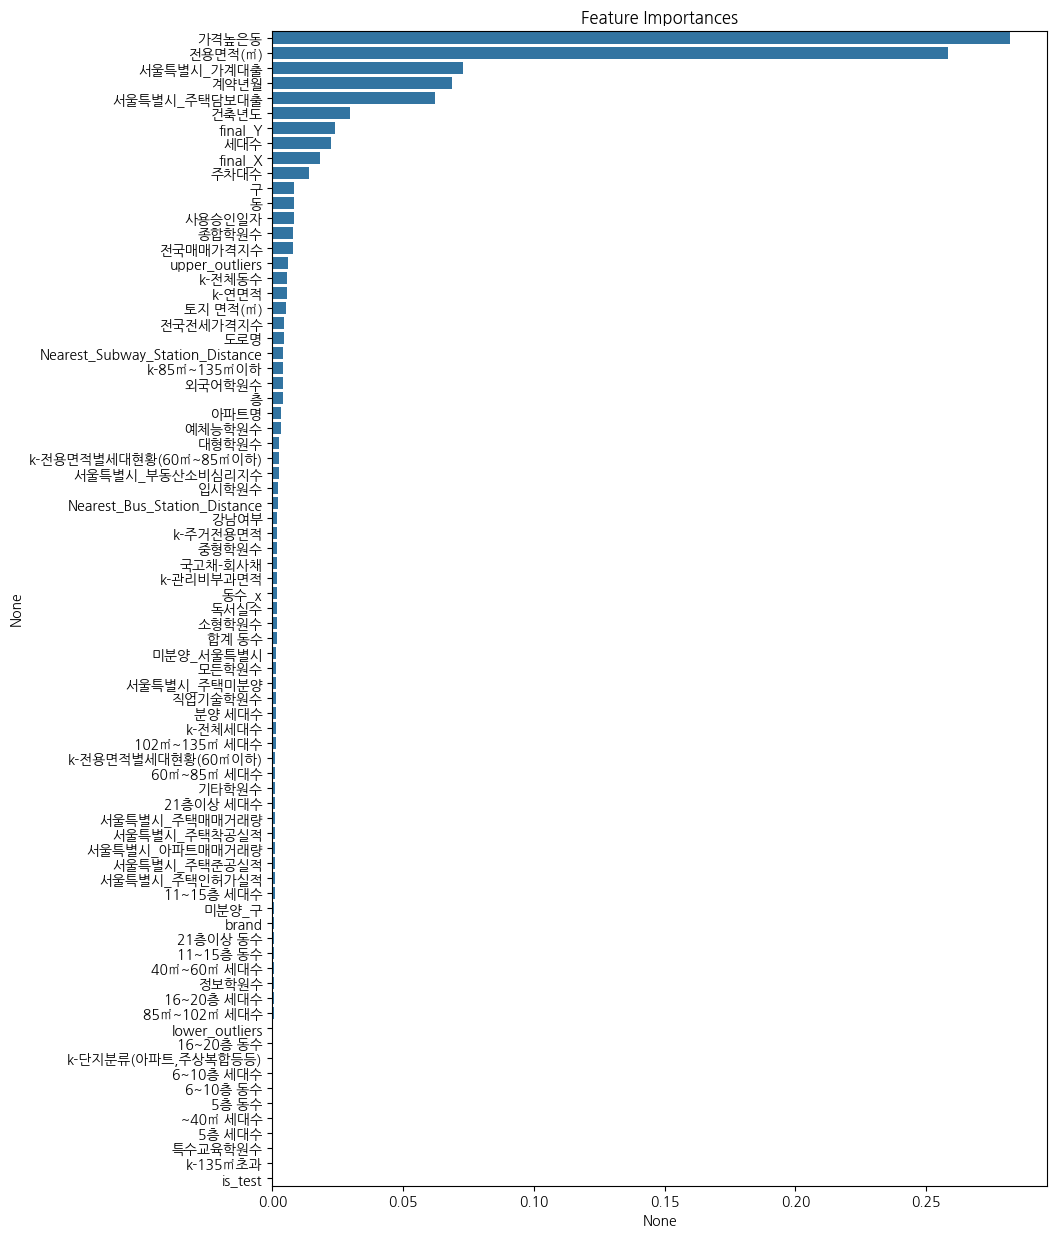

In [22]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,15))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [23]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('rf_0715.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Permutation importance 방법을 변수 선택에 이용해보겠습니다.
perm = PermutationImportance(model,        # 위에서 학습된 모델을 이용하겠습니다.
                             scoring = 'neg_mean_squared_error',        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid data에 대해 적합시킵니다.

In [ ]:
# Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
X_val['target'] = y_val
X_val['pred'] = pred

In [ ]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [ ]:
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [ ]:
X_val_sort.head()

In [ ]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [ ]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [ ]:
display(error_top100.head(1))
display(best_top100.head(1))

In [ ]:
# 저장된 모델을 불러옵니다.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [25]:
%%time
X_test = test_for_model.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)

CPU times: user 222 ms, sys: 12 ms, total: 234 ms
Wall time: 39.6 ms


In [26]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('rf_0715.csv', index=False)